In [2]:
import glob
import os
import pandas as pd

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter


In [3]:
filePaths = [f for f in glob.glob(os.path.join('data', '*.csv'))]
print(filePaths)
# File names
fileNames = [p.split('data/')[1].split('.csv')[0] for p in filePaths]
print(fileNames)
# Create tuples for dictionary comprehension
fileKeyVal = zip(fileNames, filePaths)
# Create dictionary of files
fileDict = {name: pd.read_csv(file) for name, file in fileKeyVal}


fileDict.keys()

['data/app_events.csv', 'data/app_labels.csv', 'data/events.csv', 'data/gender_age_test.csv', 'data/gender_age_train.csv', 'data/label_categories.csv', 'data/phone_brand_device_model.csv', 'data/sample_submission.csv']
['app_events', 'app_labels', 'events', 'gender_age_test', 'gender_age_train', 'label_categories', 'phone_brand_device_model', 'sample_submission']


dict_keys(['app_labels', 'label_categories', 'phone_brand_device_model', 'gender_age_test', 'gender_age_train', 'app_events', 'events', 'sample_submission'])

In [4]:
app_events = fileDict.get("app_events")
print(app_events.columns)

app_labels = fileDict.get("app_labels")
print(app_labels.columns)

events = fileDict.get("events")
print(events.columns)

ga_train = fileDict.get("gender_age_train")
print(ga_train.columns)
print(ga_train.shape)
#print(ga_train.describe(include='all'))

label_categories = fileDict.get("label_categories")
print(label_categories.columns)

pdbm = fileDict.get("phone_brand_device_model")
print(pdbm.columns)
print(pdbm.shape)

app_labels = fileDict.get("app_labels")
print(app_labels.columns)



Index(['event_id', 'app_id', 'is_installed', 'is_active'], dtype='object')
Index(['app_id', 'label_id'], dtype='object')
Index(['event_id', 'device_id', 'timestamp', 'longitude', 'latitude'], dtype='object')
Index(['device_id', 'gender', 'age', 'group'], dtype='object')
(74645, 4)
Index(['label_id', 'category'], dtype='object')
Index(['device_id', 'phone_brand', 'device_model'], dtype='object')
(187245, 3)
Index(['app_id', 'label_id'], dtype='object')


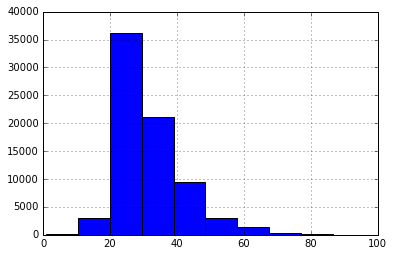

In [5]:
#plt.hist(ga_train["age"], bins=50, range=[0,100])
#plt.xlabel('Age')
#plt.ylabel('Count')
#plt.show()


# labels, values = zip(*Counter(ga_train["group"]).items())
# counts = pd.DataFrame({'labels' : labels, 'values' : values})
# counts = counts.sort_values('labels')
# indexes = np.arange(len(counts))
# width = .5

# plt.figure(figsize=(20,10))
# plt.bar(indexes, counts['values'], width, color = ['b', 'g', 'y', 'k', 'r', 'orange', 'purple', 'pink', 'white', 'gray', 'yellow', 'brown'])
# plt.xticks(indexes + width * 0.5, counts['labels'])
# plt.xlabel('Gender/Age Group')
# plt.ylabel('Count')
# plt.show()
ga_train.age.hist()

In [6]:
ga_train_with_pdbm = pd.merge(ga_train, pdbm, on='device_id', how='left')
print(ga_train_with_pdbm.columns)
print(ga_train_with_pdbm.shape)
print(ga_train_with_pdbm.head())

Index(['device_id', 'gender', 'age', 'group', 'phone_brand', 'device_model'], dtype='object')
(74839, 6)
             device_id gender  age   group phone_brand device_model
0 -8076087639492063270      M   35  M32-38          小米         MI 2
1 -2897161552818060146      M   35  M32-38          小米         MI 2
2 -8260683887967679142      M   35  M32-38          小米         MI 2
3 -4938849341048082022      M   30  M29-31          小米       红米note
4   245133531816851882      M   30  M29-31          小米         MI 3


In [7]:
ga_train_with_pdbm_and_events = pd.merge(ga_train_with_pdbm, events, on='device_id', how='left')
print(ga_train_with_pdbm_and_events.columns)
print(ga_train_with_pdbm_and_events.shape)
print(ga_train_with_pdbm_and_events.describe())

Index(['device_id', 'gender', 'age', 'group', 'phone_brand', 'device_model',
       'event_id', 'timestamp', 'longitude', 'latitude'],
      dtype='object')
(1271913, 10)
          device_id           age      event_id     longitude      latitude
count  1.271913e+06  1.271913e+06  1.220474e+06  1.220474e+06  1.220474e+06
mean  -2.963497e+16  3.338748e+01  1.626750e+06  7.841065e+01  2.183423e+01
std    5.320773e+18  9.755179e+00  9.396839e+05  5.381275e+01  1.564637e+01
min   -9.223067e+18  1.000000e+00  1.000000e+00 -1.800000e+02 -3.380000e+01
25%   -4.664097e+18  2.600000e+01           NaN           NaN           NaN
50%   -1.229633e+17  3.100000e+01           NaN           NaN           NaN
75%    4.631837e+18  3.900000e+01           NaN           NaN           NaN
max    9.222849e+18  9.600000e+01  3.252948e+06  1.511800e+02  5.364000e+01


/Users/brad/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [8]:
ga_train_with_pdbm_and_events_and_app_events = pd.merge(ga_train_with_pdbm_and_events, app_events, on='event_id', how='left')
print(ga_train_with_pdbm_and_events_and_app_events.columns)
print(ga_train_with_pdbm_and_events_and_app_events.shape)
print(ga_train_with_pdbm_and_events_and_app_events.describe(include='all'))

Index(['device_id', 'gender', 'age', 'group', 'phone_brand', 'device_model',
       'event_id', 'timestamp', 'longitude', 'latitude', 'app_id',
       'is_installed', 'is_active'],
      dtype='object')
(12987131, 13)


/Users/brad/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


           device_id    gender           age     group phone_brand  \
count   1.298713e+07  12987131  1.298713e+07  12987131    12987131   
unique           NaN         2           NaN        12         120   
top              NaN         M           NaN    M32-38          华为   
freq             NaN   9515799           NaN   2447981     4115516   
mean    1.020054e+17       NaN  3.337944e+01       NaN         NaN   
std     5.294136e+18       NaN  9.435700e+00       NaN         NaN   
min    -9.223067e+18       NaN  1.000000e+00       NaN         NaN   
25%    -4.386679e+18       NaN  2.700000e+01       NaN         NaN   
50%     8.918101e+16       NaN  3.100000e+01       NaN         NaN   
75%     4.691463e+18       NaN  3.900000e+01       NaN         NaN   
max     9.222849e+18       NaN  9.600000e+01       NaN         NaN   

       device_model      event_id            timestamp     longitude  \
count      12987131  1.293569e+07             12935692  1.293569e+07   
unique         

In [9]:
ga_train_with_pdbm_and_events_and_app_events_and_labels = pd.merge(ga_train_with_pdbm_and_events_and_app_events, app_labels, on='app_id', how='left')
print(ga_train_with_pdbm_and_events_and_app_events_and_labels.columns)
print(ga_train_with_pdbm_and_events_and_app_events_and_labels.shape)
print(ga_train_with_pdbm_and_events_and_app_events_and_labels.describe(include='all'))

Index(['device_id', 'gender', 'age', 'group', 'phone_brand', 'device_model',
       'event_id', 'timestamp', 'longitude', 'latitude', 'app_id',
       'is_installed', 'is_active', 'label_id'],
      dtype='object')
(13447651, 14)


/Users/brad/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


           device_id    gender           age     group phone_brand  \
count   1.344765e+07  13447651  1.344765e+07  13447651    13447651   
unique           NaN         2           NaN        12         120   
top              NaN         M           NaN    M32-38          华为   
freq             NaN   9866315           NaN   2544607     4283903   
mean    1.065641e+17       NaN  3.350085e+01       NaN         NaN   
std     5.291652e+18       NaN  9.473287e+00       NaN         NaN   
min    -9.223067e+18       NaN  1.000000e+00       NaN         NaN   
25%    -4.355594e+18       NaN  2.700000e+01       NaN         NaN   
50%     9.686680e+16       NaN  3.200000e+01       NaN         NaN   
75%     4.699057e+18       NaN  3.900000e+01       NaN         NaN   
max     9.222849e+18       NaN  9.600000e+01       NaN         NaN   

       device_model      event_id            timestamp     longitude  \
count      13447651  1.339621e+07             13396212  1.339621e+07   
unique         

In [10]:
data = pd.merge(ga_train_with_pdbm_and_events_and_app_events_and_labels, label_categories, on='label_id', how='left')
print(data.columns)
print(data.shape)
print(data.describe(include='all'))

Index(['device_id', 'gender', 'age', 'group', 'phone_brand', 'device_model',
       'event_id', 'timestamp', 'longitude', 'latitude', 'app_id',
       'is_installed', 'is_active', 'label_id', 'category'],
      dtype='object')
(13447651, 15)


/Users/brad/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


           device_id    gender           age     group phone_brand  \
count   1.344765e+07  13447651  1.344765e+07  13447651    13447651   
unique           NaN         2           NaN        12         120   
top              NaN         M           NaN    M32-38          华为   
freq             NaN   9866315           NaN   2544607     4283903   
mean    1.065641e+17       NaN  3.350085e+01       NaN         NaN   
std     5.291652e+18       NaN  9.473287e+00       NaN         NaN   
min    -9.223067e+18       NaN  1.000000e+00       NaN         NaN   
25%    -4.355594e+18       NaN  2.700000e+01       NaN         NaN   
50%     9.686680e+16       NaN  3.200000e+01       NaN         NaN   
75%     4.699057e+18       NaN  3.900000e+01       NaN         NaN   
max     9.222849e+18       NaN  9.600000e+01       NaN         NaN   

       device_model      event_id            timestamp     longitude  \
count      13447651  1.339621e+07             13396212  1.339621e+07   
unique         